# Intro 

In this notebook we try to use first models to summarize text extractively. These will then serve as baseline models for the future neural networks. Our goal is to create summaries for news articles. 

**Ressources & References:**
* [Extract Keywords Using spaCy in Python](https://medium.com/better-programming/extract-keywords-using-spacy-in-python-4a8415478fbf)
* [Extractive Summarization Using spaCy in Python](https://medium.com/better-programming/extractive-text-summarization-using-spacy-in-python-88ab96d1fd97)
* [Text Summarization In SpaCy](https://github.com/Jcharis/Natural-Language-Processing-Tutorials/blob/master/NLP_with_SpaCy/Text%20Summarization%20In%20SpaCy.ipynb)
* [Text Summarization In Python With SpaCy Library](https://www.presentslide.in/2019/08/text-summarization-python-spacy-library.html?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)
* [Understand Text Summarization and create your own summarizer in python](https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70)

# Imports & Installs

In [ ]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_lg

In [4]:
#!pip install wordcloud

In [ ]:
# Check if spaCy works properly 
!python -m spacy validate

In [6]:
import pandas as pd 
import numpy as np
import spacy
from collections import Counter
from string import punctuation
import math
import en_core_web_lg
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

from sum_functions import * 

In [3]:
nlp = en_core_web_lg.load()

# Summarization 

**Approach:** We look at which words occur most often in an article. We weight our keywords accordingly and calculate the importance of each sentence. So it is [TF-IDF (term frequency-inverse document frequency)](https://monkeylearn.com/blog/what-is-tf-idf/) - *a statistical measure that evaluates how relevant a word is to a document in a collection of documents*. The sentence with the most important words will have the most importance. At the end we get the most important X sentences as a summary or bullet points. 

In [8]:
# read the testfile
text = read_article("article_text.txt")

In [4]:
get_summary(text)

Reading time for the entire article: 3 mins (aprox)
# of sentences (pre):  27
# of sentences (post): 3


# mountain # wildlife # lions # freeway # project 

------------------------------------------------------------------------------------------------------------------------
-  For mountain lions living in los angeles—and yes, mountain lions do manage to survive in the second-largest city in the u.s.—the 101 freeway is a major barrier to their daily routines. 

-  “we know from science what’s going on there, and it’s a little deeper than just that the animals are getting hit by cars,” says beth pratt of the national wildlife federation, one of several partner organizations working on the project. 

-  The situation is most acute for mountain lions, who risk extinction in the area within decades, but other wildlife, from lizards to birds, are also showing a decline in genetic diversity.
 



In [5]:
word_frequency(text)

Words that appear more than two times:
------------------------------------------------------------------------------------------------------------------------
wildlife 7
mountain 6
lions 5
freeway 5

 5
says 5
project 4
animals 4
area 4
crossing 3
pratt 3
urban 3


**We can also display it as a word cloud, making it more visual.**

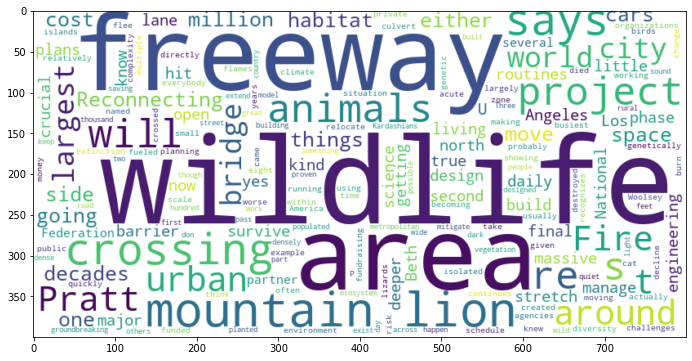

In [25]:
wordcloud = WordCloud(background_color = "white", width = 800, height = 400).generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear");

**We try an other summarization with gensim and compare it to the summary above.**

In [27]:
from gensim.summarization import summarize
gen_sum = summarize(text)

In [41]:
for sentence in gen_sum.split("."):
    print(sentence)

“We know from science what’s going on there, and it’s a little deeper than just that the animals are getting hit by cars,” says Beth Pratt of the National Wildlife Federation, one of several partner organizations working on the project

“They are becoming genetically isolated, because animals cannot move into the small islands of habitat that are created by our freeways
” The situation is most acute for mountain lions, who risk extinction in the area within decades, but other wildlife, from lizards to birds, are also showing a decline in genetic diversity

Around the world, other wildlife crossings exist and have been proven to work, though the project will be the first in a dense urban area

“We’re saving mountain lions, and we’re reconnecting an ecosystem for all wildlife,” she says



**Most of the sentences overlap, but we find the first summary slightly better and continue working with this function for now.**

## Future Work

We want to test other methods and see if the results (of other summarizations) differ.

For example we can try the metric ["Cosine Similarity"](https://www.machinelearningplus.com/nlp/cosine-similarity/). 
It is *a metric used to measure how similar the documents are irrespective of their size.* We will focus on the different sentences in a text/article to find similiarities. Another metric which can be used is the ["Jaccard Similarity"](https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50). The difference is that it *takes only unique set of words for each sentence*.

In addition you could also try the abstract summary by creating completely new sentences.